In [1]:
import sys

# 코랩을 사용중인지 확인합니다.
if 'google.colab' in sys.modules:
    from google.colab import files
    uploaded = files.upload()
    sample_images = ['/content/' + fn for fn in uploaded.keys()]

    # 업로드된 파일이 없으면 깃허브에서 다운로드합니다.
    if len(uploaded) < 1:
        import gdown
        base_url = 'https://github.com/rickiepark/aiml4coders/raw/main/ch03/'
        for i in range(1,4):
            gdown.download(base_url + 'hh_image_{}.jpg'.format(i))
        sample_images = ['/content/hh_image_{}.jpg'.format(i) for i in range(1,4)]

# 로컬 컴퓨터면 ch03 폴더에 있는 이미지를 사용합니다.
else:
    sample_images = ['hh_image_{}.jpg'.format(i) for i in range(1,4)]

Downloading...
From: https://github.com/rickiepark/aiml4coders/raw/main/ch03/hh_image_1.jpg
To: /content/hh_image_1.jpg
100%|██████████| 97.4k/97.4k [00:00<00:00, 25.7MB/s]
Downloading...
From: https://github.com/rickiepark/aiml4coders/raw/main/ch03/hh_image_2.jpg
To: /content/hh_image_2.jpg
100%|██████████| 260k/260k [00:00<00:00, 39.5MB/s]
Downloading...
From: https://github.com/rickiepark/aiml4coders/raw/main/ch03/hh_image_3.jpg
To: /content/hh_image_3.jpg
100%|██████████| 61.4k/61.4k [00:00<00:00, 69.9MB/s]


In [2]:
import urllib.request
import zipfile

url = "https://storage.googleapis.com/learning-datasets/horse-or-human.zip"
file_name = "horse-or-human.zip"
training_dir = 'horse-or-human/training/'
urllib.request.urlretrieve(url, file_name)

zip_ref = zipfile.ZipFile(file_name, 'r')
zip_ref.extractall(training_dir)
zip_ref.close()

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 전체 이미지를 1./255로 스케일을 조정합니다.
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(300, 300),
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [5]:
import tensorflow as tf

# training_ds = tf.keras.utils.image_dataset_from_directory(
#     training_dir,
#     image_size = (300, 300),
#     label_mode = 'binary'
# )

# ImageDataGenerator 대신 image_dataset_from_directory 사용할 경우 전처리 따로 필요

model = tf.keras.models.Sequential([
    # tf.keras.layers.Rescaling(1. / 255, input_shape = (300, 300, 3)),
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu',
                           input_shape = (300, 300, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu',
                           input_shape = (300, 300, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu',
                           input_shape = (300, 300, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu',
                           input_shape = (300, 300, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu',
                           input_shape = (300, 300, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')

])

In [6]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate = 0.001),
              metrics = ['accuracy'])

In [7]:
model.fit(train_generator, epochs = 5)

Epoch 1/5
33/33 [==============================] - 153s 5s/step - loss: 0.6938 - accuracy: 0.6621
Epoch 2/5
33/33 [==============================] - 107s 3s/step - loss: 0.3346 - accuracy: 0.8637
Epoch 3/5
33/33 [==============================] - 124s 4s/step - loss: 0.1045 - accuracy: 0.9552
Epoch 4/5
33/33 [==============================] - 120s 4s/step - loss: 0.2602 - accuracy: 0.9318
Epoch 5/5
33/33 [==============================] - 145s 4s/step - loss: 0.0524 - accuracy: 0.9786


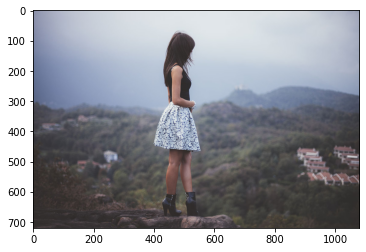

1/1 [==============================] - 0s 148ms/step
모델 출력: 1.0
/content/hh_image_1.jpg는 사람입니다.
--------------------


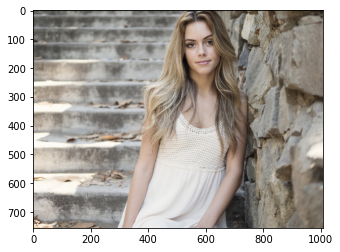

1/1 [==============================] - 0s 42ms/step
모델 출력: 1.0
/content/hh_image_2.jpg는 사람입니다.
--------------------


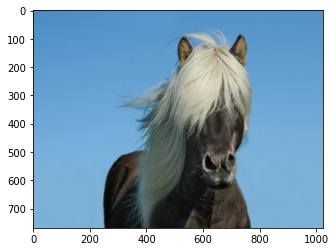

1/1 [==============================] - 0s 43ms/step
모델 출력: 1.0
/content/hh_image_3.jpg는 사람입니다.
--------------------


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image

for fn in sample_images:
  # 이미지 출력
  plt.imshow(mpimg.imread(fn))
  plt.show()

  # 이미지 불러오기
  img = tf.keras.utils.load_img(fn, target_size = (300, 300)) # fn은 path
  x = tf.keras.utils.img_to_array(img) # 이미지를 2D 배열로 변환
  x = np.expand_dims(x, axis = 0) # 모델이 3D 배열을 기대하므로 차원 확장

  classes = model.predict(x)

  print('모델 출력:', classes[0][0])
  if classes[0][0] > 0.5:
    print(fn + '는 사람입니다.')
  else:
    print(fn + '는 말입니다')
  print('--------------------')

## 이미지 증식

In [9]:
train_datagen = ImageDataGenerator(
    rescale = 1. / 255,  # 정규화 적용
    rotation_range = 40, # 왼쪽 또는 오른쪽으로 40도까지 랜덤하게 기울이기
    width_shift_range = 0.2, # 이미지를 수직으로 20%까지 랜덤하게 이동
    height_shift_range = 0.2, # 이미지를 수평으로 20%까지 랜덤하게 이동
    shear_range = 0.2, # 이미지를 20%까지 랜덤하게 기울이기
    zoom_range = 0.2, # 이미지를 20%까지 랜덤하게 확대하기
    horizontal_flip = True, # 이미지를 수평 또는 수직으로 랜덤하게 뒤집기
    fill_mode = 'nearest' # 이동하거나 기울인 후에 누락된 픽셀을 근처 픽셀로 채우기
)

In [ ]:
# 이미지 전처리 층을 이용해 앞의 데이터 증식 설정과 비슷하게 구현

# model = tf.keras.models.Sequential([
#     tf.keras.layers.Rescaling(1. / 255, input_shape = (300, 300, 3)),
#     tf,keras.layers.RandomRotation(0.11, fill_mode = 'nearest'),
#     tf.keras.layers.RandomTranslation(0.2, 0.2, fill_mode = 'nearest'),
#     tf.keras.layers.RandomZoom(0.2, fill_mode = 'nearest'),
#     tf.keras.layers.RandomFlip('horizontal'),
#     tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu',
#                            input_shape = (300, 300, 3)),
#     tf.keras.layers.MaxPooling2D((2, 2)),

#     tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu',
#                            input_shape = (300, 300, 3)),
#     tf.keras.layers.MaxPooling2D((2, 2)),

#     tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu',
#                            input_shape = (300, 300, 3)),
#     tf.keras.layers.MaxPooling2D((2, 2)),

#     tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu',
#                            input_shape = (300, 300, 3)),
#     tf.keras.layers.MaxPooling2D((2, 2)),

#     tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu',
#                            input_shape = (300, 300, 3)),
#     tf.keras.layers.MaxPooling2D((2, 2)),

#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512, activation = 'relu'),
#     tf.keras.layers.Dense(1, activation = 'sigmoid')

# ])

Epoch 1/5
33/33 [==============================] - 108s 3s/step - loss: 0.0927 - accuracy: 0.9708
Epoch 2/5
33/33 [==============================] - 113s 3s/step - loss: 0.0923 - accuracy: 0.9815
Epoch 3/5
33/33 [==============================] - 99s 3s/step - loss: 0.2570 - accuracy: 0.9669
Epoch 4/5
33/33 [==============================] - 100s 3s/step - loss: 0.0187 - accuracy: 0.9942
Epoch 5/5
33/33 [==============================] - 101s 3s/step - loss: 0.1014 - accuracy: 0.9796


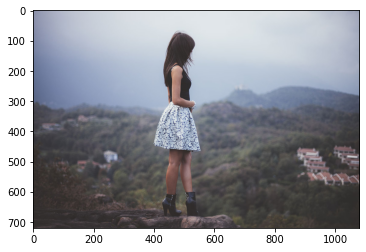

1/1 [==============================] - 0s 44ms/step
모델 출력: 1.0
/content/hh_image_1.jpg는 사람입니다.
--------------------


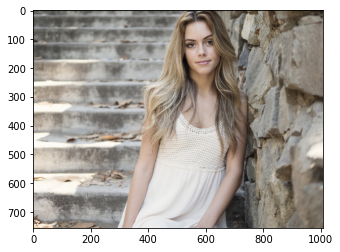

1/1 [==============================] - 0s 44ms/step
모델 출력: 0.0
/content/hh_image_2.jpg는 말입니다
--------------------


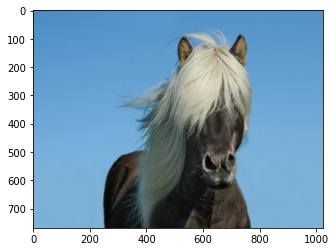

1/1 [==============================] - 0s 42ms/step
모델 출력: 1.0
/content/hh_image_3.jpg는 사람입니다.
--------------------


In [10]:
model.fit(train_generator, epochs = 5)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image

for fn in sample_images:
  # 이미지 출력
  plt.imshow(mpimg.imread(fn))
  plt.show()

  # 이미지 불러오기
  img = tf.keras.utils.load_img(fn, target_size = (300, 300)) # fn은 path
  x = tf.keras.utils.img_to_array(img) # 이미지를 2D 배열로 변환
  x = np.expand_dims(x, axis = 0) # 모델이 3D 배열을 기대하므로 차원 확장

  classes = model.predict(x)

  print('모델 출력:', classes[0][0])
  if classes[0][0] > 0.5:
    print(fn + '는 사람입니다.')
  else:
    print(fn + '는 말입니다')
  print('--------------------')

## 전이 학습
- 이미 훈련된 모델의 일부를 가져와 새 모델에서 재사용함으로써 손쉽게 데이터를 구축하는 기술

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)
pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                                include_top=False,
                                weights=None)
pre_trained_model.load_weights(weights_file)

pre_trained_model.summary()

In [14]:
for layer in pre_trained_model.layers:
  layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed7')
print('마지막 층의 출력 크기: ', last_layer.output_shape)
last_output = last_layer.output

마지막 층의 출력 크기:  (None, 7, 7, 768)


In [15]:
# 출력을 펼쳐서 1차원으로 만들기
x = layers.Flatten()(last_output)
# 1204개의 은닉 유닛과 렐루 활성화 함수를 사용한 완전 연결 층을 추가
x = layers.Dense(1024, activation = 'relu')(x)
x = layers.Dense(1, activation = 'sigmoid')(x)

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_3/Sigmoid:0', description="created by layer 'dense_3'")


In [18]:
model = Model(pre_trained_model.input, x)

model.compile(optimizer = RMSprop(learning_rate = 0.0001),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [ ]:
model.summary()

#### 전이 학습 훈련 및 검증

In [21]:
validation_url = "https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip"

validation_file_name = "validation-horse-or-human.zip"
validation_dir = 'horse-or-human/validation/'
urllib.request.urlretrieve(validation_url, validation_file_name)

zip_ref = zipfile.ZipFile(validation_file_name, 'r')
zip_ref.extractall(validation_dir)
zip_ref.close()

In [22]:
validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    class_mode='binary'
)

Found 256 images belonging to 2 classes.


In [24]:
train_generator = train_datagen.flow_from_directory(
    training_dir,
    batch_size = 20,
    class_mode = 'binary',
    target_size = (150, 150)
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size = 20,
    class_mode = 'binary',
    target_size = (150, 150)
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [25]:
model.fit(train_generator,
          epochs=5,
          validation_data=validation_generator)

Epoch 1/5
52/52 [==============================] - 101s 2s/step - loss: 0.1336 - acc: 0.9494 - val_loss: 0.0051 - val_acc: 1.0000
Epoch 2/5
52/52 [==============================] - 115s 2s/step - loss: 0.0248 - acc: 0.9903 - val_loss: 0.0116 - val_acc: 0.9961
Epoch 3/5
52/52 [==============================] - 91s 2s/step - loss: 0.0371 - acc: 0.9873 - val_loss: 0.0834 - val_acc: 0.9805
Epoch 4/5
52/52 [==============================] - 88s 2s/step - loss: 0.0187 - acc: 0.9961 - val_loss: 0.1746 - val_acc: 0.9453
Epoch 5/5
52/52 [==============================] - 77s 1s/step - loss: 0.0219 - acc: 0.9932 - val_loss: 0.0125 - val_acc: 0.9961


## 다중 분류

In [26]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/rps.zip \
    -O ./rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/rps-test-set.zip \
    -O ./rps-test-set.zip

--2023-03-13 11:50:22--  https://storage.googleapis.com/learning-datasets/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.63.128, 142.250.31.128, 142.251.111.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.63.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘./rps.zip’

./rps.zip           100%[===================>] 191.38M   146MB/s    in 1.3s    

2023-03-13 11:50:23 (146 MB/s) - ‘./rps.zip’ saved [200682221/200682221]

--2023-03-13 11:50:24--  https://storage.googleapis.com/learning-datasets/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.63.128, 142.250.31.128, 142.251.111.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.63.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘./rps-test-set.zip’

./rps-test-set.zi

In [27]:
local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')
zip_ref.close()

TRAINING_DIR = "./rps/"
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

local_zip = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')
zip_ref.close()

VALIDATION_DIR = "./rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [28]:
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (150, 150),
    class_mode = 'categorical'
)

Found 2520 images belonging to 3 classes.


In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu',
                           input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

In [31]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(train_generator, 
          epochs=5, 
          validation_data=validation_generator)

In [ ]:
# 코랩을 사용중인지 확인합니다.
if 'google.colab' in sys.modules:
    from google.colab import files
    uploaded = files.upload()
    sample_images = ['/content/' + fn for fn in uploaded.keys()]

    # 업로드된 파일이 없으면 깃허브에서 다운로드합니다.
    if len(uploaded) < 1:
        import gdown
        base_url = 'https://github.com/rickiepark/aiml4coders/raw/main/ch03/'
        for i in range(1,4):
            gdown.download(base_url + 'rsp_image_{}.jpg'.format(i))
        sample_images = ['/content/rsp_image_{}.jpg'.format(i) for i in range(1,4)]

# 로컬 컴퓨터면 ch03 폴더에 있는 이미지를 사용합니다.
else:
    sample_images = ['rsp_image_{}.jpg'.format(i) for i in range(1,4)]

In [ ]:
rsp_name = ['보', '바위', '가위']

for fn in sample_images:
    # 이미지 출력
    plt.imshow(mpimg.imread(fn))
    plt.show()
    
    # 이미지 불러오기
    img = tf.keras.utils.load_img(fn, target_size=(150, 150))
    x = tf.keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    classes = model.predict(x)

    idx = np.argmax(classes[0])
    print(fn + "는 {}입니다.".format(rsp_name[idx]))

#### 추가로 공부가 필요한 내용
- 이미지 증식, 전이 학습의 정의, 종류, 사용 사례